## Medtext Pipeline

Assembling, parsing, crawling of all components to build the medtext databases. Further information can be found in the wiki: http://wiki.eonum.ch/doku.php?id=data:medicaltext




In [50]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import load_config
import json
import nltk

### define a new configuration
config_dict = {
    # databases
    "medical_books_pdf_folder": "/media/data/medical_books/medical_books_pdf",
    "medical_books_txt_folder": "/media/data/medical_books/medical_books_plaintxt/",
    "wiki_dump_url": "https://dumps.wikimedia.org/dewiki/latest/dewiki-latest-pages-articles.xml.bz2",
    "wiki_dump": "/media/data/wiki_dumps/dewiki-latest-pages-articles.xml.bz2",
    "categories_file": "/media/data/wiki_dumps/categories",
    "categories_dump_file": "../wiki_dumps/dewiki-latest-category.sql",
    "wiki_all_texts": "/media/data/wiki_dumps/wiki_med_txts_2018",
    "wiki_medical_txt": "/media/data/wiki_dumps/wiki_med_txts",
    "wiki_non_medical_txt": "/media/data/wiki_dumps/wiki_non_med_txts",
    "crawler_output_html": "/media/data/medtextcollector/data/output/crawler/raw",
    "crawler_output_txt": "/media/data/medtextcollector/data/output/crawler/pages",
    
    # models
    "medtext_classifier_config": "",
    "embedding_model": "",
    
    # chose tokenizer. possible values: "nst" and "sgt"
    ## NonStemmingTokenizer: 'nst'
    # - no stemming, only remove punctuation marks
    # - lowercase letters

    ## SimpleGermanTokenizer: 'sgt'
    # - remove punctuation marks
    # - stemming
    # - lowercase letters
    "tokenizer": "nst",
    
    # where to store the configuration file
    "config_path": "/media/data/configuration-medtext-notebook-pipeline.json"
}


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
### save config file (don't change)
config_src = config_dict["config_path"]

with open(config_src, 'w+') as f:
    json.dump(config_dict, f, indent=4)
    
# load config object based on config file (don't change)
config = load_config.Configuration(config_src, True)

In [52]:
# load sentence detector and tokenizer

import nltk
from notebooks.tokenizer import get_tokenizer
from data_analysis_toolkit import extract_sentences

sentence_detector = nltk.data.load('tokenizers/punkt/german.pickle')
tokenizer = get_tokenizer(config_dict['tokenizer'])

print(extract_sentences("Dies ist ein Beispielsatz! Und hier noch einmal.\nNeuer Absatz: Aber hallo.. Du"
                                 + "\nUnd ein Beispiel z.B. oder z.Bsp: Ein Beispiel. " +
                        "J. P. Klein (1), S. Moritz (2), T. Berger (3)", sentence_detector))

tokenizer.tokenize("Dies ist ein Beispielastz! Komm wir machen eine Überraschung und stemmen diesen Satz.\n p 987*/-_à!è")

['Dies ist ein Beispielsatz!', 'Und hier noch einmal.', 'Neuer Absatz: Aber hallo.. Du Und ein Beispiel z.B. oder z.Bsp: Ein Beispiel.', 'J. P.', 'Klein (1), S. Moritz (2), T. Berger (3)']


['dies',
 'ist',
 'ein',
 'beispielastz',
 'komm',
 'wir',
 'machen',
 'eine',
 'überraschung',
 'und',
 'stemmen',
 'diesen',
 'satz',
 'p',
 '987',
 'à',
 'è']

Raw data bases


database,files
/media/data/medical_books/medical_books_pdf,53869
/media/data/medtextcollector/data/output/crawler/raw,8009
/media/data/wiki_dumps/wiki_non_med_txts,0


Cleaned data bases
[('', 143094), ('der', 102303), ('und', 76370), ('die', 73428), ('in', 56629), ('von', 33867), ('des', 26276), ('für', 25388), ('kategorie', 23762), ('im', 22356), ('mit', 21649), ('den', 21243), ('das', 20147), ('zu', 19092), ('eine', 17804), ('ist', 17507), ('als', 16744), ('er', 16495), ('ein', 14441), ('bei', 14113), ('auf', 13537), ('dem', 13438), ('auch', 12726), ('an', 12352), ('werden', 12330), ('sich', 11500), ('oder', 11363), ('nach', 10923), ('einer', 10883), ('wurde', 10874)]


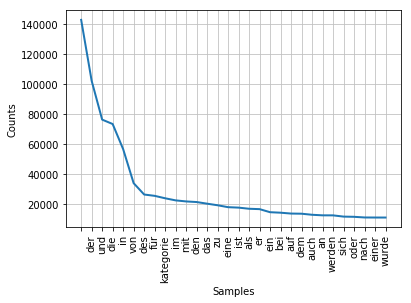

[(' ', 3355019), ('e', 2852673), ('n', 1761049), ('i', 1542960), ('r', 1426469), ('t', 1202012), ('s', 1064929), ('a', 992815), ('d', 782838), ('h', 740419), ('u', 718912), ('l', 690228), ('o', 614343), ('g', 525011), ('c', 510912), ('m', 411653), ('b', 297341), ('f', 269034), ('\n', 243307), ('.', 237072), ('k', 234527), ('z', 231458), ('w', 199495), ('p', 191789), (',', 161344), ('S', 143389), ('v', 138314), ('1', 123089), ('A', 118293), ('B', 111840), ('|', 108876), ('-', 106478), ('D', 103602), ('0', 103432), ('ä', 101402), ('M', 98421), ('E', 97386), ('ü', 91656), ('K', 89550), (':', 77859)]


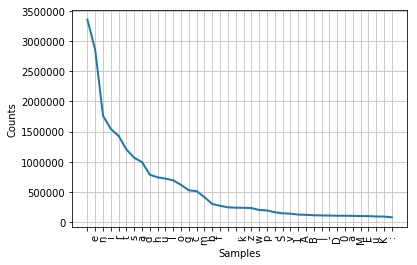

['/media/data/wiki_dumps/wiki_med_txts_2018', 4378, 4378, 170931, 3143443, 256834, 2773858]
[('', 128030), ('der', 99223), ('und', 74183), ('die', 70981), ('in', 54895), ('von', 32710), ('des', 25492), ('für', 24780), ('kategorie', 23154), ('im', 21499), ('mit', 20893), ('den', 20544), ('das', 19378), ('zu', 18567), ('eine', 17342), ('ist', 16953), ('als', 16241), ('er', 16090), ('ein', 13962), ('bei', 13759), ('auf', 13044), ('dem', 12928), ('auch', 12388), ('werden', 12033), ('an', 11997), ('sich', 11115), ('oder', 11072), ('nach', 10608), ('einer', 10579), ('wurde', 10456)]


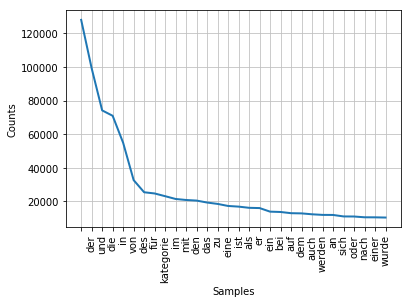

[(' ', 3228093), ('e', 2760188), ('n', 1706548), ('i', 1494489), ('r', 1379175), ('t', 1163000), ('s', 1030370), ('a', 956857), ('d', 758787), ('h', 717221), ('u', 696453), ('l', 665194), ('o', 593291), ('g', 506576), ('c', 493881), ('m', 397172), ('b', 287172), ('f', 260815), ('\n', 231575), ('.', 229311), ('k', 226706), ('z', 225096), ('w', 192822), ('p', 184997), (',', 156197), ('S', 137901), ('v', 133816), ('1', 117400), ('A', 114089), ('B', 107678), ('-', 101072), ('D', 99979), ('0', 99301), ('|', 99287), ('ä', 98653), ('M', 95454), ('E', 93816), ('ü', 88674), ('K', 86299), (':', 74922)]


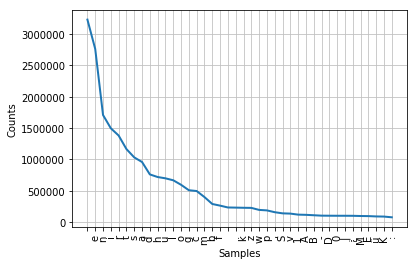

['/media/data/wiki_dumps/wiki_med_txts_2018/positive', 4160, 4160, 165425, 3022048, 246677, 2666965]
[('der', 184520), ('die', 147031), ('und', 134707), ('in', 91074), ('', 79764), ('von', 63780), ('des', 46542), ('ist', 43325), ('mit', 42833), ('den', 40765), ('eine', 40375), ('das', 40154), ('für', 37613), ('im', 37324), ('zu', 36798), ('bei', 33172), ('als', 30476), ('auf', 28278), ('ein', 27703), ('oder', 27150), ('auch', 27050), ('werden', 26822), ('sich', 24930), ('durch', 23576), ('einer', 23303), ('sind', 22928), ('dem', 22787), ('wird', 22473), ('an', 20822), ('nicht', 19385)]


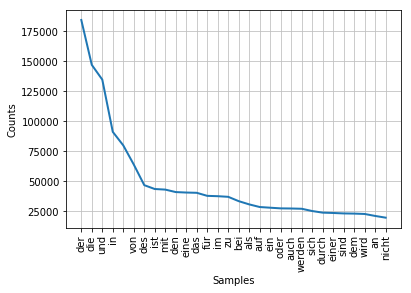

[('e', 5234379), (' ', 4898559), ('n', 3242452), ('i', 2813328), ('r', 2483108), ('t', 2090367), ('s', 1897280), ('a', 1724201), ('d', 1387178), ('h', 1300492), ('u', 1278325), ('l', 1252568), ('o', 1178626), ('g', 950404), ('c', 895688), ('m', 773383), ('b', 536751), ('k', 476353), ('f', 475559), ('z', 399577), ('p', 375851), ('.', 368338), ('w', 348996), (',', 266278), ('v', 247917), ('S', 215821), ('ä', 192738), ('A', 189454), ('D', 174481), ('B', 166492), ('K', 150705), ('-', 149052), ('ü', 148435), ('M', 144345), ('E', 143612), ('y', 142754), ('P', 140425), ('1', 123366), ('G', 111007), (':', 110827)]


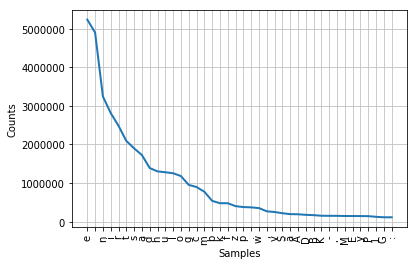

['/media/data/wiki_dumps/wiki_med_txts', 10485, 10485, 249609, 5194030, 395226, 4634479]


database,files,documents,sentences,tokens,vocabulary,vocabulary freq > 5
/media/data/wiki_dumps/wiki_med_txts_2018,"4,378","4,378","170,931","3,143,443","256,834","2,773,858"
/media/data/wiki_dumps/wiki_med_txts_2018/positive,"4,160","4,160","165,425","3,022,048","246,677","2,666,965"
/media/data/wiki_dumps/wiki_med_txts,"10,485","10,485","249,609","5,194,030","395,226","4,634,479"


Union vocabulary: 476,653
Intersection vocabulary: 174,053


In [53]:
# get number of files, sentences, tokens, vocabulary and character histograms in each database. 
# This cell takes quite a while to execute!
from data_analysis_toolkit import get_files_from_folder, load_documents

databases_raw = [config["medical_books_pdf_folder"], config["crawler_output_html"],
                config["wiki_non_medical_txt"], ]
databases_cleaned = [config['wiki_all_texts'], config['wiki_all_texts'] + '/positive', config["wiki_medical_txt"]]

from IPython.display import HTML, display
import tabulate
table = [["database", "files"]]

print("Raw data bases")
for db in  databases_raw:
    table.append([db, len(get_files_from_folder(db))])
display(HTML(tabulate.tabulate(table, tablefmt='html')))

print("Cleaned data bases")
table = [["database", "files", "documents", "sentences", "tokens", "vocabulary", "vocabulary freq > 5"]]
vocs = []
docs = []
for db in  databases_cleaned:
    files = get_files_from_folder(db)
    documents, load_errors = load_documents(files)
    sentences = []
    tokens = []
    docs.append(documents)
    fdc = nltk.FreqDist()
    fdc_tokens = nltk.FreqDist()
    for document in documents:
        fdc.update(document)
        sentences.extend(extract_sentences(document, sentence_detector))
    for sentence in sentences:
        tokens.extend(tokenizer.tokenize(sentence))
        for token in tokens:
            fdc_tokens.update(token)
    voc = set(tokens)
    vocs.append(voc)
    
    # word frequencies
    fd = nltk.FreqDist(tokens)
    # print(fd.most_common(30))
    fd.plot(30,cumulative=False)   
    
    # character frequencies
    # print(fdc.most_common(40))
    fdc.plot(40,cumulative=False)
    
    fdc_tokens.plot(40,cumulative=False)
    
    cropped_vocab_size = len([e for e in fd.items() if fd.get(e[0]) > 5])
    
    print([db, len(files), len(documents), len(sentences), len(tokens), len(voc), cropped_vocab_size])
    table.append([db, "{:,}".format(len(files)), "{:,}".format(len(documents)), 
                  "{:,}".format(len(sentences)), "{:,}".format(len(tokens)), 
                  "{:,}".format(len(voc)), "{:,}".format(cropped_vocab_size)])
    
    
    
    # TODO print character histograms
display(HTML(tabulate.tabulate(table, tablefmt='html')))

voc_union = vocs[0]
voc_intersection = vocs[0]
for voc in vocs:
    voc_union = voc_union.union(voc)
    voc_intersection = voc_intersection.intersection(voc)

print("Union vocabulary: " + "{:,}".format(len(voc_union)))
print("Intersection vocabulary: " + "{:,}".format(len(voc_intersection)))

    

In [25]:
# inspect and analyze sample documents
from random import randint
for documents in docs:
    document = documents[randint(0, len(documents))]
    print("\n== Document ==")
    print(document[:500])
    
    print("== Sentences ==")
    for sentence in extract_sentences(document, sentence_detector)[:4]:
        print(sentence)
        
    print("== Tokens ==")
    for sentence in extract_sentences(document, sentence_detector)[:4]:
        print(tokenizer.tokenize(sentence))
    


== Document ==
Leitthema
Diabetologe 2008 · 4:416–424
DOI 10.1007/s11428-008-0252-5
Online publiziert: 27. Juli 2008
© Springer Medizin Verlag 2008

P. Rösen
Deutsches Diabetesforschungszentrum, Düsseldorf

Die Mehrzahl der Patienten mit Diabetes mellitus verstirbt an akuten thrombotischen Komplikationen vorbestehender
Gefäßläsionen. Die hämostaseologischen
Kontrollmechanismen haben somit eine unmittelbare Bedeutung für die klinische Prognose des Patienten, insbesondere dann, wenn wie im Fall des Diabetes
dami
== Sentences ==
Leitthema Diabetologe 2008 · 4:416–424 DOI 10.1007/s11428-008-0252-5 Online publiziert: 27. Juli 2008 © Springer Medizin Verlag 2008  P. Rösen Deutsches Diabetesforschungszentrum, Düsseldorf  Die Mehrzahl der Patienten mit Diabetes mellitus verstirbt an akuten thrombotischen Komplikationen vorbestehender Gefäßläsionen.
Die hämostaseologischen Kontrollmechanismen haben somit eine unmittelbare Bedeutung für die klinische Prognose des Patienten, insbesondere dann, w

In [67]:
# download wiki dump. Takes ~ 40min
import urllib.request

from tqdm import tqdm
#from tqdm import tnrange, tqdm_notebook

class TqdmUpTo(tqdm):
    """Provides `update_to(n)` which uses `tqdm.update(delta_n)`."""
    def update_to(self, b=1, bsize=1, tsize=None):
        """
        b  : int, optional
            Number of blocks transferred so far [default: 1].
        bsize  : int, optional
            Size of each block (in tqdm units) [default: 1].
        tsize  : int, optional
            Total size (in tqdm units). If [default: None] remains unchanged.
        """
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)  # will also set self.n = b * bsize

with TqdmUpTo(unit='B', unit_scale=True, miniters=1, desc=config["wiki_dump_url"].split('/')[-1]) as t:  # all optional kwargs
    urllib.request.urlretrieve(config["wiki_dump_url"], config["wiki_dump"], reporthook=t.update_to, data=None)

dewiki-latest-pages-articles.xml.bz2: 4.88GB [39:21, 2.06MB/s]                               


In [26]:
# extract wiki dump. Takes ~ 15min

from subprocess import call
call(["bzip2", "-dk", config["wiki_dump"]])

0

In [34]:
# create categories file
call(["ruby", "scripts/scan_categories.rb", config["categories_dump_file"], config['categories_file']])

0

In [39]:
# extract medical and non medical articles from wiki dump
# convert XML to TXT: medical and non-medical (negative) samples

# execute this on titan:
print("ruby scripts/wiki_xml_extractor.rb " + config["wiki_dump"].replace(".bz2", "") + " "
      + config['wiki_all_texts'] + " " + config['categories_file']) 

ruby scripts/wiki_xml_extractor.rb /media/data/wiki_dumps/dewiki-latest-pages-articles.xml /media/data/wiki_dumps/wiki_med_txts_2018 /media/data/wiki_dumps/categories


In [ ]:
# train medtext classifier

# TODO

In [ ]:
# start crawler

# TODO

In [ ]:
# extract TXT from PDFs

# TODO

In [ ]:
# train embedding / start medword

# TODO